In [1]:
import pandas as pd

In [3]:
# Load the dataset
dataset = pd.read_csv('mental_health_drugs_full_dataset.csv')

# Check for missing values
missing_values = dataset.isnull().sum()
missing_values

Drug Name              0
Drug Class             0
Target                 0
Mechanism of Action    0
Indication             0
Approval Year          0
Common Side Effects    0
Relevant Studies       0
dtype: int64

In [4]:
dataset.drop_duplicates(inplace=True)

In [6]:
# Frequency count for drug classes
drug_class_counts = dataset['Drug Class'].value_counts()

# Indications count
indication_counts = dataset['Indication'].value_counts()

drug_class_counts, indication_counts

(Drug Class
 SARI                      83
 NDRI                      76
 Atypical Antipsychotic    75
 Anxiolytic                75
 SSRI                      70
 NaSSA                     61
 TCA                       60
 Name: count, dtype: int64,
 Indication
 Panic Disorder         74
 Bipolar Disorder       71
 Anxiety                69
 Depression             65
 Schizophrenia          57
 Generalized Anxiety    57
 Insomnia               54
 OCD                    53
 Name: count, dtype: int64)

#### Comparative Effectiveness

In [9]:
# Aggregate side effect per drug class
side_effects_summary = dataset.groupby('Drug Class')['Common Side Effects'].apply(list)
side_effects_summary

Drug Class
Anxiolytic                [Somolence, Diarrhea, Weight Gain, Fatigue, Dr...
Atypical Antipsychotic    [Nursea, Insomnia, Somolence, Headache, Nursea...
NDRI                      [Nursea, Nursea, Weight Gain, Headache, Insomn...
NaSSA                     [Insomnia, Dry Mouth, Nursea, Nursea, Somolenc...
SARI                      [Nursea, Weight Gain, Insomnia, Fatigue, Akath...
SSRI                      [Diarrhea, Somolence, Insomnia, Diarrhea, Nurs...
TCA                       [Diarrhea, Somolence, Drowsiness, Fatigue, Wei...
Name: Common Side Effects, dtype: object

#### Correlation Analysis

In [14]:
# Create a numeric dataframe (potentially useful numeric fields)
numeric_data = pd.DataFrame({
    'Approval Year': dataset['Approval Year']
})

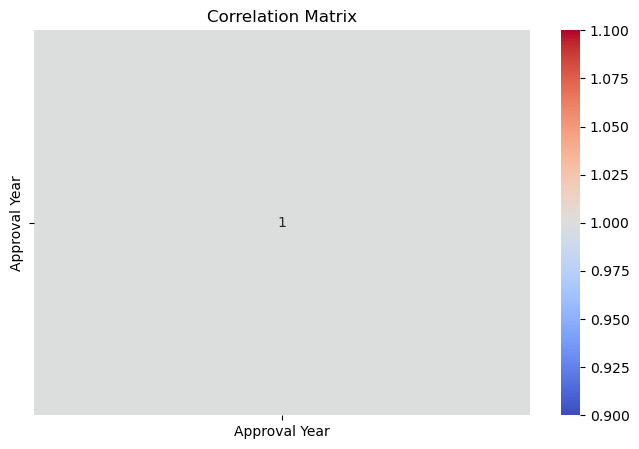

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the correlation of side effects (assumed numerical coding of side effects)
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()